In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import joblib for model persistence
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, zero_one_loss, classification_report, confusion_matrix, 
                            precision_score, recall_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay)

# Question 1
For a presidential election, campaign organizers for both the Republican and Democrat parties are interested in identifying undecided voters who would consider voting for their party. The file BlueOrRed.csv (provided on canvas) contains data on a sample of voters with tracked variables including: whether or not they are undecided regarding their candidate preference, age, whether they own a home, gender, marital status, household size, income, years of education, and whether they attend church. For this dataset, you would use the Undecided variable as your output variable and the rest of the variables as your input variables. You want to predict whether a candidate is undecided(Undecided=1) or decided(Undecided=0). 

## A
Upload the data into Python and check for missing data. If there is any missing data, drop the cases that have the missing data. 

In [46]:
data = pd.read_csv("BlueOrRed.csv")
# Check if there are null values in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            10000 non-null  int64  
 1   HomeOwner      10000 non-null  int64  
 2   Female         10000 non-null  int64  
 3   Married        10000 non-null  int64  
 4   HouseholdSize  10000 non-null  int64  
 5   Income         10000 non-null  float64
 6   Education      10000 non-null  int64  
 7   Church         10000 non-null  int64  
 8   Undecided      10000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


In [47]:
# Drop missing values
data = data.dropna()
data

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1
...,...,...,...,...,...,...,...,...,...
9995,55,1,1,1,2,37.0,18,0,1
9996,29,1,1,0,5,100.0,15,1,1
9997,59,0,1,0,1,35.0,20,0,1
9998,66,0,0,1,3,4.0,8,1,0


## B
Normalize the continuous variables using min-max normalization. You should obtain a new dataset that has your normalized continuous input variables, the categorical input variables (the categorical input variables are fine and don’t need to be normalized), and your output variable.

In [3]:
# It can be seen here that the only continuous variable is Income
data.dtypes

Age                int64
HomeOwner          int64
Female             int64
Married            int64
HouseholdSize      int64
Income           float64
Education          int64
Church             int64
Undecided          int64
dtype: object

In [4]:
minmax = MinMaxScaler()
normalized = data.copy()
# min max normalize the income variable, as it is the only one that is continuous
normalized["Income"] = minmax.fit_transform(normalized["Income"].values.reshape(-1,1))
normalized

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,0.306422,15,0,1
1,46,1,1,1,6,0.763303,15,1,0
2,55,1,0,1,6,0.234862,16,0,1
3,50,1,0,1,4,0.025688,8,0,0
4,49,1,1,1,2,0.113761,15,1,1
...,...,...,...,...,...,...,...,...,...
9995,55,1,1,1,2,0.060550,18,0,1
9996,29,1,1,0,5,0.176147,15,1,1
9997,59,0,1,0,1,0.056881,20,0,1
9998,66,0,0,1,3,0.000000,8,1,0


## C
Why do you think using min-max normalization is a better choice for this situation compared to using other scalers such as the Standard Scaler which standardizes the data?

Standard scaler is a better fit when we know that the data follow a normal distribution, which income does not. 
We want the transformation to keep the shape of the data as much as possible, and for it to be resilient to outliers, which min max scaler is able to do.

## D
Use the train_test_split() function in the sklearn.model_selection module in scikit-learn to split the data into training and test sets. Your test set should be 30% of the entire data. Print the shape of the X_train, y_train, X_test and y_test data. You can use the default value of the random state in splitting the data, which is random_state=42. 

In [5]:
# Prepare the X and y from the dataset
X = normalized.drop(["Undecided"], axis=1).copy()
y = normalized["Undecided"].copy()
# Splits the dataset into training and testing with a 70:30 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.3), random_state=42)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (7000, 8)
X_test shape: (3000, 8)
y_train shape: (7000,)
y_test shape: (3000,)


## E
Construct a decision tree and fit the tree into the data. Then use your decision tree model to make predictions on the training set as well as on the test set. Assign your results to y_train_pred and y_test_pred respectively. Print out the first 100 predictions for each of the  y_train_pred and y_test_pred. 

In [6]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
y_train_pred = dec_tree.predict(X_train)
y_test_pred = dec_tree.predict(X_test)

In [7]:
print(y_train_pred[:100])

[0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1]


In [8]:
print(y_test_pred[:100])

[0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


## F
Find the overall accuracy of the tree model on the training set and on the test set. Use the accuracy_score() function in the sklearn.metrics module. Does the tree overfit the model? Why or why not?  

In [9]:
accuracy_score(y_train, y_train_pred)

1.0

In [10]:
accuracy_score(y_test, y_test_pred)

0.969

I would not consider the tree to be overfitted, as the difference in accuracy between the training dataset and the test dataset is less than 0.1, which can be considered normal, as most of the time the performance on the training dataset is higher than the performance on the test dataset.

## G
Also, use the .score() method of the tree estimator to find the overall accuracy on the training set and test set. 

In [11]:
dec_tree.score(X_train, y_train)

1.0

In [12]:
dec_tree.score(X_test, y_test)

0.969

The results for .score are the same as accuracy_score

## H
Use the zero_one_loss() function inside the sklearn.metric module to compute the overall prediction error of the tree model on the test set and training set. 

In [13]:
zero_one_loss(y_train, y_train_pred)

0.0

In [14]:
zero_one_loss(y_test, y_test_pred)

0.031000000000000028

# Question 2
Do other assessment of your model using the following tools in sklearn.metrics module

## A
Generate the classification report using the classification_report () 

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1814
           1       0.96      0.97      0.96      1186

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



## B
Generate the confusion matrix using confusion_matrix() 

In [16]:
confusion_matrix(y_test, y_test_pred)

array([[1762,   52],
       [  41, 1145]])

## C
Generate the precision score using precision_score() 

In [17]:
# As it was not specified, average will be set to default, which is "binary"
precision_score(y_test, y_test_pred)

0.9565580618212197

## D
Generate the recall score using recall_score()

In [18]:
# As it was not specified, average will be set to default, which is "binary"
recall_score(y_test, y_test_pred)

0.9654300168634065

## E
Generate the f1 score using f1_score()

In [19]:
# As it was not specified, average will be set to default, which is "binary"
f1_score(y_test, y_test_pred)

0.9609735627360471

## F
When is it more appropriate to use f1 score (or precision score and recall) compared to using the overall accuracy to evaluate your model?

F1 is particularly useful when the data is uneven, and when you want to find a balance between precision and recall.   
Recall is useful when the focus is on predicting class 1 observations and on false negatives.  
Precision comes handy when what matters the most is the rate of true positives.  

## G
Generate a roc curve using plot_roc_curve() 

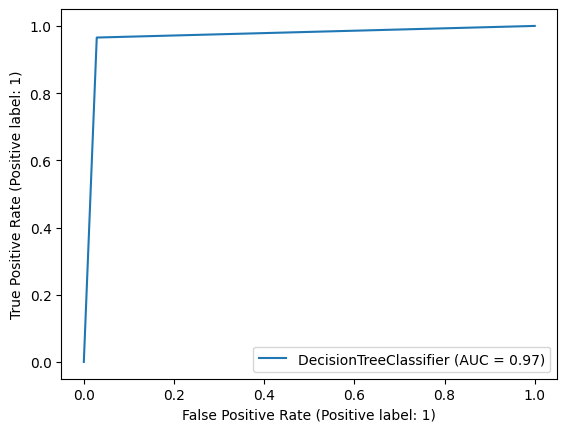

In [20]:
dec_tree_dsp = RocCurveDisplay.from_estimator(dec_tree, X_test, y_test)
dec_tree_dsp

## H
Plot the confusion matrix using plot_confusion_matrix

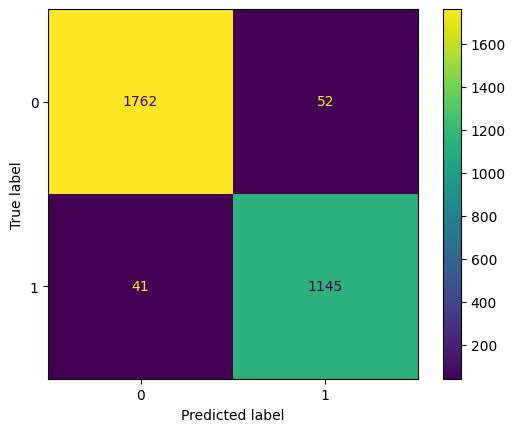

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred),display_labels=dec_tree.classes_)
disp.plot()
plt.show()

# Question 3
You will now use cross validation to find better accuracy scores as well as to tune your hyperparameters. The hyperparameters of a decision tree as shown below. We are more interested in optimizing the depth of the tree (max_depth).  
![Entropy](./decision_tree_parameters.png)  

## A
First retrieve the maximum depth of this decision tree. Use clf.tree_.max_depth where clf is the name of your estimator and tree is the module in sklearn. 

In [22]:
dec_tree = DecisionTreeClassifier(ccp_alpha=0, class_weight= None, criterion= "gini", max_depth= None, max_features= None, max_leaf_nodes= None,
                                 min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0, random_state=None, splitter="best")
# min_impurity_split has been deprecated
dec_tree.fit(X_train, y_train)
tree_max_depth = dec_tree.tree_.max_depth
tree_max_depth

18

## B
You will find the optimal depth of the tree by tuning the max_depth hyperparameter. Write a for loop to iteratively compute the overall error rate of the model on the test set only for the possible values of the maximum depth of the tree. Here are ideas for your code:  

You will need to initialize a variable outside the loop to track the error rates for each maximum depth value. 

Then plot the overall error rate on the y-axis and the maximum depth of the tree on the x-axis. Also use np.argmin() on the error rates you obtained to retrieve the optimal maximum depth of the tree with the least error rate. Does this value match with what you see on your plot? 


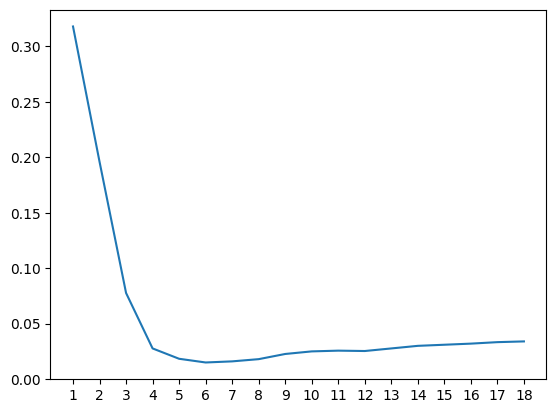

In [23]:
error_rates = []
for i in range(1,tree_max_depth+1):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error_rates.append(zero_one_loss(y_test, y_pred))
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(1, tree_max_depth+1, step=1))  # Set label locations.
plt.plot([x for x in range(1,tree_max_depth+1)],error_rates)

In [24]:
print("The lowest overall error is {} for depth {}".format(error_rates[np.argmin(error_rates)], np.argmin(error_rates)+1))

The lowest overall error is 0.015000000000000013 for depth 6


Yes, the value matches with what can be seen in the plot. It does not match, however, the max depth of the first decision tree

## C
Now, you will still find the optimal maximum depth of the decision tree model using grid search cross validation. Additionally, you will be simultaneously optimizing the max_features hyperparameter as well. You can check the documentation to see what these hyperparameters represent. You will use the GridSearchCV() constructor inside the sklearn.model_selection module. Make sure to pass the arguments (estimator and param_grid into the GridSearchCV() constructor. Set the parameter cv=8. Do you have the same optimal maximum depth as you got in the question above?  (See class notes on Modeling in Scikit-learn for more ideas). You can use these parameter grid as one of the arguments:

In [25]:
param_grid = {
    "max_depth" : range(1,tree_max_depth+1),
    "max_features": [0.2, 0.4, 0.6, 0.8]
}
dec_tree = DecisionTreeClassifier()
clf = GridSearchCV(dec_tree, param_grid, cv=8)
clf.fit(X_train, y_train)
GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_max_features',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [26]:
clf.best_params_

{'max_depth': 7, 'max_features': 0.8}

It can be seen that the best max_depth using GridSearchCV is 7, which is different from the one previously obtained

## D
You will tune the maximum depth hyperparameter again using cross validation but this time, you will use the cross_val_score() function inside the sklearn.model_selection module. You will use this cross_val_score() function in combination with a for loop to find the optimal maximum depth of the tree. Here is a code snippet idea:

Track the error rate for each depth and plot the error rates versus the corresponding maximum depths of the tree. Also use the np.argmin() on the error rates to retrieve the optimal maximum depth , corresponding to the lowest error rate. Does the retrieved optimal maximum depth look like what you see on your plot? ?  

Instructions said to plot with x = depth, but I believe that setting depth as each of the elements, with each of the cross validation splits as the x, and the accuracy as y is the best way to see how as depth increases at first, the accuracy improves, and then it can stagnate, and even lose accuracy

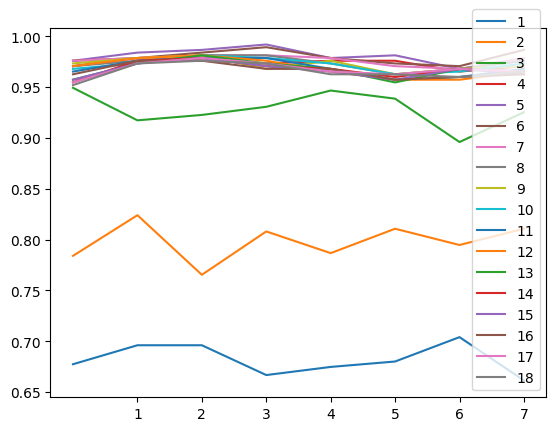

In [27]:
error_rates = []
for i in range(1,tree_max_depth+1):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    error_rates.append(cross_val_score(estimator=clf, X = X_test, y = y_test, scoring= "accuracy", cv = 8))
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(1, tree_max_depth+1, step=1))  # Set label locations.
for depth in error_rates:
    plt.plot(depth)
plt.legend([x for x in range(1, len(error_rates)+1)], loc="lower right")
plt.show()

Instructions say to use argmin, however, as we are measuring accuracy, the higher the better, so it should be argmax, to get the depth at which the accuracy is maximized. 

In [28]:
accuracy_mean = []
# Get the mean accuracy for each depth
for depth in error_rates:
    accuracy_mean.append(np.mean(depth))

In [29]:
print("The accuracy for the best depth is: {}. Best depth: {}".format(accuracy_mean[np.argmax(accuracy_mean)],np.argmax(accuracy_mean)+1))

The accuracy for the best depth is: 0.9803333333333333. Best depth: 5


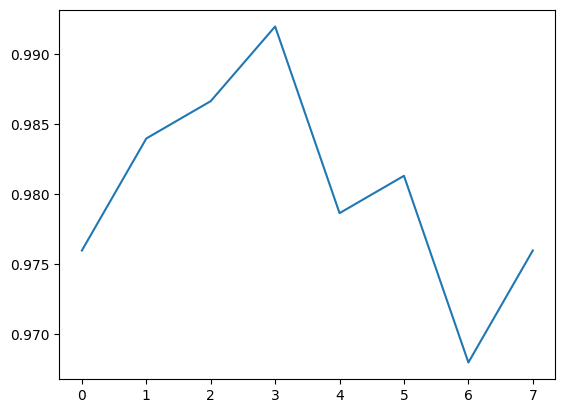

In [30]:
plt.plot(error_rates[4])

## E
You will use another approach to plot the error rates versus the maximum depth of the tree. Here, you would use the validation_curve() function inside the sklearn.model_selection module. This function implements cross validation and returns the training accuracy scores and test (validation) accuracy scores for each iteration in the k-fold cross validation, for each of the hyperparameter values. You will need to aggregate the scores using np.mean(axis=1) to get the average of the accuracy scores for all iterations, for each hyperparameter value. Use these average accuracy scores to obtain corresponding error rates for the training and test (validation) sets. Then plot the error rates on the training set versus the maximum depth values. Also plot on the same figure, the error rates of the test (or validation) set versus the maximum depth values. What is the optimal maximum depth?

In [31]:
dec_tree = DecisionTreeClassifier()
param_name, param_range = "max_depth", range(1, tree_max_depth+1)
train_scores, test_scores = validation_curve(dec_tree, X_train, y_train, param_name=param_name, param_range=param_range)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

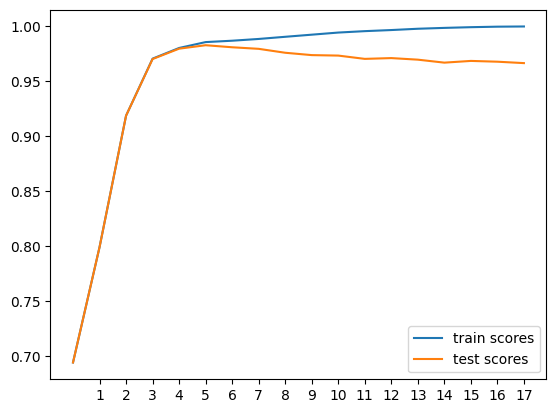

In [32]:
plt.xticks(np.arange(1, tree_max_depth+1, step=1))  # Set label locations.
plt.plot(train_scores_mean)
plt.plot(test_scores_mean)
plt.legend(["train scores", "test scores"])
plt.show()

The optimal depth would be 4, as on 5 the accuracy starts going down for the test dataset, while it keeps increasing for the training dataset, indicating overfitting. 

# Question 4
Find your own dataset suitable for classification with at least three input variables and 200 cases: You will build a decision tree classifier and a random forest classifier. Find some interesting dataset instead of the popular iris data, etc. Feel free to use a dataset suitable for classification from this link provided below or some other source of your choice: https://vincentarelbundock.github.io/Rdatasets/articles/data.html 
Address the following and include code/output snippets from b) to f). Include the response under each sub question.


Chosen dataset: military
https://vincentarelbundock.github.io/Rdatasets/doc/openintro/military.html

## A
State your research question, for example: Are decision trees and random forest good models for predicting whether someone will default on a loan or not based on their age and income level? This is just an example, your dataset does not have to be (or should not be) about loans. 

Can the rank of a military service member be predicted using decision trees and random forests taking into consideration their race, grade, branch, and gender?

## B
Data pre-processing (to the extent deemed necessary)

In [33]:
# Import the dataset
data = pd.read_csv("military.csv")
# Drop the column rownames, as it is simply the index
data = data.drop(["rownames"], axis=1)
# race column does not include the hispanic race, which is in its own column called hisp. So they must be merged into a single column
data.loc[data["hisp"] == True, "race"] = "hisp"
# Now the hisp column can be dropped
data = data.drop(["hisp"], axis = 1)
# Finally, columns grade, branch, gender, and race have to be changed to one hot
one_hot = pd.get_dummies(data.drop(["rank"], axis=1))
one_hot["rank"] = data["rank"]
data = one_hot.copy()
data

,grade_enlisted,grade_officer,grade_warrant officer,branch_air force,branch_army,branch_marine corps,branch_navy,gender_female,gender_male,race_ami/aln,race_asian,race_black,race_hisp,race_multi,race_p/i,race_unk,race_white,rank
0,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,2
1,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,2
2,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5
3,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5
4,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414588,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,11
1414589,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,11
1414590,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,11
1414591,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,11


In [34]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
grade_enlisted,1414593,2,True,1183889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade_officer,1414593,2,False,1203068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade_warrant officer,1414593,2,False,1395414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
branch_air force,1414593,2,False,1083107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
branch_army,1414593,2,False,858744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
branch_marine corps,1414593,2,False,1211627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
branch_navy,1414593,2,False,1090301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_female,1414593,2,False,1211875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_male,1414593,2,True,1211875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_ami/aln,1414593,2,False,1394149,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## C
Data splitting 

In [35]:
X = data.drop(["rank"], axis=1).copy()
y = data["rank"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.3), random_state=42)

## D
Model construction (a decision tree and a random forest)

In [36]:
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(random_state=0)

## E
Hyperparameter turning (for each model, tune the hyperparameter that is important to you and use any of the methods for hyperparameter tuning learned in class such as cross validation with for loop, gridsearch cross validation, etc. You could tune more than a single parameter for each model if you want). 

In [37]:
# Decision tree tuningusing GridSearchCV
param_grid = {
    "max_depth" : range(1,15),
    "min_samples_split" : range(2,5),
    "max_features": [0.2, 0.4, 0.6, 0.8]
}
clf = GridSearchCV(dec_tree, param_grid, cv=8, n_jobs = -1)
clf.fit(X_train, y_train)
clf.best_params_

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Sixth Quarter - Winter 2024/Data Science Tools 2/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=8.
  warnings.warn(

KeyboardInterrupt



It can be seen that the best estimator for the decision tree is with max depth of 12, maximum features = 0.6, and minimum samples split = 2

In [ ]:
dec_tree = clf.best_estimator_.copy()
dump(dec_tree, "decision_tree.joblib")

In [38]:
dec_tree = load("decision_tree.joblib")

In [ ]:
# Random Forest tuning using GridSearchCV
# Decision tree tuningusing GridSearchCV
param_grid = {
    "n_estimators" : range(100,140,10),
    "max_depth" : range(3,10)
}
clf = GridSearchCV(rand_forest, param_grid, cv=5, n_jobs = -1)
clf.fit(X_train, y_train)
#GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid)
clf.best_params_

In [ ]:
rand_forest = clf.best_estimator_
# Save random forest model, as it takes a while to train
dump(rand_forest, "rand_fores.joblib")

In [39]:
rand_forest = load("rand_fores.joblib")

## F
Use the best or optimal parameter values to build a model, then compute the accuracy score for the decision tree and for the random forest). 

In [40]:
dec_tree

DecisionTreeClassifier(max_depth=12, max_features=0.6)

In [41]:
rand_forest

RandomForestClassifier(max_depth=8, n_estimators=130, random_state=0)

In [44]:
# Checking accuracy for decision tree using the training dataset to verify overfitting
y_pred = dec_tree.predict(X_train)
accuracy_score(y_train, y_pred)

0.2894442116106098

In [42]:
# Checking accuracy for decision tree
y_pred = dec_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.2879249159947028

In [45]:
# Checking accuracy for random forest using the training dataset to verify overfitting
y_pred = rand_forest.predict(X_train)
accuracy_score(y_train, y_pred)

0.2892523340890615

In [43]:
# Checking accuracy for random forest
y_pred = rand_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.28766571311425193

## G
Discuss about overfitting for both models and, also discuss which model is better for classification for your dataset and why? 

It can be seen that both decision tree and random forest failed to produce good results for the classification and prediction of rank for military service members based on their race, grade, branch, and gender.  
In retrospective, it makes sense that a dataset with so few input variables would not be enough to categorize the rank of military service members, as one big factor in rank is the experience, which is not included in this dataset. 
Another possible reason is that, as this is not taking age into consideration, new recruits that happen to share the same race, gender, and branch as a veteran would have the same input variables, but the rank would be very different.  
As a conclusion, these models are not good prediction models for this dataset, or the dataset as it is cannot be used for prediction. 

Neither of these models was overfitted, but neither of them provided good results. 